# Лабораторная работа 4
# Тема 4. Алгебраические уравнения в кольце вычетов

# Теоретические сведения и подсказки

## Разбираюсь с теорией

Пример уравнения первой степени:

In [1]:
x = 4, 7, 10
d = 8
n = 3 * d
a = 7 * d
b = 13 * d
[(a * i) % n == b % n for i in x]

[True, True, True]

Реализация поиска обратного элемента из первой лабораторной:

In [2]:
def reverse_elem(a, b):
    if a == b - 1:
        return a % b
    a_copy = a
    b_copy = b
    m11, m12 = 1, 0
    m21, m22 = 0, 1
    while b:
        q = a // b
        a, b = b, a % b
        m11, m12 = m12, m11 - m12*q
        m21, m22 = m22, m21 - m22*q
    gcd = m11 * a_copy + m21 * b_copy
    if gcd == 1:
        return m11
    else:
        raise ValueError('base is not invertible for the given modulus')

In [3]:
reverse_elem(a / d, n / d) == pow(int(a / d), -1, int(n / d)) # int, иначе ошибка у pow

True

И тогда решение уравнения:

In [4]:
res = reverse_elem(a / d, n / d)
((res + (d - 1) * (n / d)) % (n / d)) == (b / d) % (n / d)

True

## Китайская теорема об остатках

**Теорема.**  
Пусть $\;n_1,\dots,n_k\in\mathbb{N},$ $\;\gcd(n_i,n_j)=1\;$ при      $\;i\neq j,$ $\;b_1,\dots,b_k\in\mathbb{Z}.\;$ Тогда система      уравнений
 $$
   \left\{\begin{array}{llll}
      x & \equiv  & b_1 & \mod n_1,\\
      x & \equiv  & b_2 & \mod n_2,\\
        & \vdots & &\\
     x & \equiv  & b_k & \mod n_k,
     \end{array}\right.\qquad (2)   
 $$
 имеет единственное в кольце $\mathbb{Z}_n$ решение
$$
 x_0=\sum\limits_{i=1}^{k} b_i N_i C_i, \qquad (*)
$$
где ${n=n_1\dots n_k,}$ ${N_i=\frac{n}{n_i},}$ $C_i$ --- обратный к $N_i$ в $\mathbb{Z}_{n_i}^*.$

**Алгоритм Гаусса.**  
Нахождение решения системы (2) при помощи формулы $(*)$ иногда называют алгоритмом Гаусса.

## Алгоритм Гарнера
Input: $b_1,\dots,b_k\in\mathbb{Z},$   
$\qquad n_1,\dots,n_k\in\mathbb{N}$ -- взаимно простые.  

Output: $x,$ $0\leq x<n_1\dots n_k,$ -- решение системы (2).  

1$.\;$ Задаем начальные значения переменных:  
$\qquad   N:=1,$  
$\qquad x:=b_1\mod n_1.$    

2$.\;$ For $\;i:=2,3,\dots,k$   
$ \qquad N:=N*n_{i-1}  $    
$\qquad C:=N^{-1}\mod n_i$    
$\qquad y:=C*(b_i-x)\mod n_i$  
$\qquad  x:=N y+x$

3$.\;$ Выдаем результат: $x.$    

# Задачи

# <font color='red'>Задание 1.</font>

Реализовать алгоритмы Гаусса и Гарнера. Сравнить скорость вычислений. Посчитать количество арифметических операций. Какие из данных алгоритмов являются полиномиальными?

## Реализация

In [5]:
import functools

def gauss(n, b):
    k = functools.reduce(lambda a, b : a * b, n) # k вместо n в реализации
    N = [k // k_i for k_i in n]
    tpl_N_n = zip(N, n)
    C = [pow(el[0], -1, el[1]) for el in tpl_N_n]
    tpl_b_N_C = zip(b, N, C)
    x_0 = sum([el[0] * el[1] * el[2] for el in tpl_b_N_C])
    return x_0

In [6]:
def garner(n, b):
    N = 1
    x = b[0]
    k = len(n)
    for i in range(1, k):
        N = N * n[i - 1]
        C = pow(N, -1, n[i]) % n[i]
        y = (C * (b[i] - x)) % n[i]
        x = N * y + x
    return x

## Проверяю алгоритм Гаусса

In [7]:
ni = [5, 7, 11]
bi = [1, 2, 3]

x = gauss(ni, bi)

print('x =', x)

x = 1521


У меня неправильно реализован расширенный алгоритм Евклида.

In [8]:
pow(77, -1, 5), reverse_elem(77, 5)

(3, -2)

In [9]:
pow(55, -1, 7), reverse_elem(55, 7)

(6, -1)

In [10]:
pow(35, -1, 11), reverse_elem(35, 11)

(6, -5)

Проверил вручную

In [11]:
res = 77*3+55*2*6+3*35*6

In [12]:
[x % i for i in ni] == bi

True

Другие примеры:

In [13]:
n1 = [99, 97, 95]
b1 = [49, 76, 65]

x = gauss(n1, b1)

print('x =', x)

x = 52640230


In [14]:
[x % i for i in n1] == b1

True

In [15]:
n2 = [12, 6, 17]
b2 = [3, 4, 2]

x = gauss(n1, b1)

print('x =', x)

x = 52640230


## Проверяю алгоритм Гарнера

In [16]:
ni = [5, 7, 11]
bi = [1, 2, 3]

x = garner(ni, bi)

print('x =', x)

x = 366


In [17]:
[x % i for i in ni] == bi

True

In [18]:
n1 = [99, 97, 95]
b1 = [49, 76, 65]

x = garner(n1, b1)

print('x =', x)

x = 639985


In [19]:
[x % i for i in n1] == b1

True

In [20]:
n2 = [12, 6, 17]
b2 = [3, 4, 2]

x = garner(n1, b1)

print('x =', x)

x = 639985


## Сравнение скорости вычислений

In [30]:
import time
import sympy as smp

n3 = list(smp.primerange(2, 200000))
b3 = range(1, len(n3) + 1)

In [31]:
# Если возьму primerange(2, 1000000), то получится система из 78498 уравнений, компьютер зависает
len(n3)

17984

In [32]:
print('Gauss:')
st = time.time()
gauss(n3, b3)
print(time.time() - st, '\n')

print('Garner:')
st = time.time()
garner(n3, b3)
print(time.time() - st, '\n')

Gauss:
27.966967344284058 

Garner:
4.71614933013916 



## Подсчет количества операций

### Алгоритм Гаусса

Для подсчета ${n=n_1\dots n_k}$: $\quad k - 1$ операций умножения.

Для подсчета ${N_i=\frac{n}{n_i}}$: $\quad k$ операций, плюс одна операция сложения.

Для подсчета суммы $ \sum\limits_{i=1}^{k} b_i N_i C_i $: $\quad (k - 1) * 2 * k $ операций, где $(k - 1)$ операций сложения, $2$ операции умножения и $k$ операций для подсчета $N_i$.
Поэтому $$f\left( n, b \right) = 2k(k-1)$$

### Алгоритм Гарнера

В алгоритме всего $k - 1$ итерация в цикле, на каждой итерации выполняется $7$ операций: $3$ умножения, $2$ взятия остатка, сложение, вычитание. Таким образом $$f(n, b) = 7(k - 1)$$

Предположу, что алгоритм Гарнера полиномиален.

# <font color='red'>Задание 2.</font>

Доказать, что множество квадратичных вычетов по модулю $p$ образует мультипликативную группу.

## Теория

Пусть $X$ есть непустое множество. Бинарной алгебраической операцией на множестве $X$ называется всякое отображение типа $\tau: X \times X \rightarrow X$, то есть всякое правило, которое всякой паре элементов $(a, b)$ ставит в соответствие какой-то  элемент из $X$.

Непустое множество $G$ с бинарной операцией $*$ называется группой, если:

1) операция $*$ ассоциативна;
2) $\exists$ нейтральный элемент $e \in G$;
3) $\forall \; a \in G \; \exists$ симметричный элемент $b \in G$.

Если дополнительно

4) $\forall \; a, b \in G \; \; a * b = b * a$, то группа называется абелевой.

Кольцом называется непустое множество $K$, на котором заданы две бинарные операции $+, *$ такие, что:

1) $(K, +)$ есть абелева группа;
2) $a (b + c) = ab + ac$ и $(a + b)c = ac + bc \forall \; \; a, b, c \in K$. Свойства дистрибутивности.

Если операция $*$ ассоциативна, то соотвествующее кольцо называется ассоциативным.

Если в кольце $\exists \; \; 1$, то его называют унитарным.

Пусть $K$ есть ассоциативное унитарное кольцо. $K^*$ есть множество обратимых элементов в $K$. $K^*$ является группой относительно операции $*$ и $$\left( ab \right)^{-1} = b^{-1} a^{-1}$$
Эта группа называется мультипликативной группой кольца $K$.

## Доказательство

По определение из лекции:

Пусть задано натуральное нечетное число $n,$  $a\in\mathbb{Z}_n^*.$ Вычет $a$ называется <font color=blue>квадратичным вычетом</font> по
    модулю $n,$ если уравнение
$$
      x^2\equiv a\mod n\qquad(3)
$$
имеет решение. В противном случае $a$ называется <font color=blue>квадратичным невычетом</font> по модулю $n.$ Множество всех вычетов обозначим через $Q_n.$ Множество квадратичных невычетов через $\overline{Q}_n.$

Важно отсюда выделить, что $a\in\mathbb{Z}_n^*.$ То есть это такой элемент, что он находится в множестве $\mathbb{Z}_n^*$. А это может быть только в том случае, если у элемента $a$ есть обратный. В кольце вычетов обратный элемент может быть только у простых чисел.

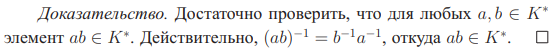